In [483]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
import utils

rcParams['figure.figsize'] = 14, 8

In [484]:
cam_data = pd.read_pickle('../traffic_data/raw_station_segment_data.pkl')
bus_data = pd.read_pickle('../traffic_data/raw_bus_data.pkl')
bus_data_coords = pd.read_pickle('../traffic_data/raw_data_with_corrigated_coords.pkl')
cam_data_month = pd.read_parquet('../traffic_data/raw_station_segment_data_2021-12-01_2022-01-01.parquet')

In [485]:
bus_data_coords = utils.preprocess_bus_data(bus_data_coords)
bus_data = utils.preprocess_bus_data(bus_data)
bus_data = utils.day_filter(bus_data,10)

In [486]:
scaler = MinMaxScaler()
train_data = utils.preprocess_cam_data(cam_data_month)['avg_speed'].values.reshape(-1,1)
train_data = pd.DataFrame(scaler.fit_transform(train_data))

In [487]:
test_data = cam_data['avg_speed'].values.reshape(-1,1)
test_data = pd.DataFrame(scaler.fit_transform(test_data))

In [488]:
estimator = OneClassSVM(kernel='rbf',gamma='scale').fit(train_data)
prediction = estimator.predict(test_data)

In [489]:
print(prediction[:20])
print("Number of outliers detected: {}".format(prediction[prediction < 0].sum()))
print("Number of normal samples detected: {}".format(prediction[prediction > 0].sum()))
print(len(prediction))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of outliers detected: -30
Number of normal samples detected: 9409
9439


In [490]:
normal_data = cam_data[cam_data.index.isin(np.where(prediction > 0)[0])]
outliers = cam_data[cam_data.index.isin(np.where(prediction < 0)[0])]

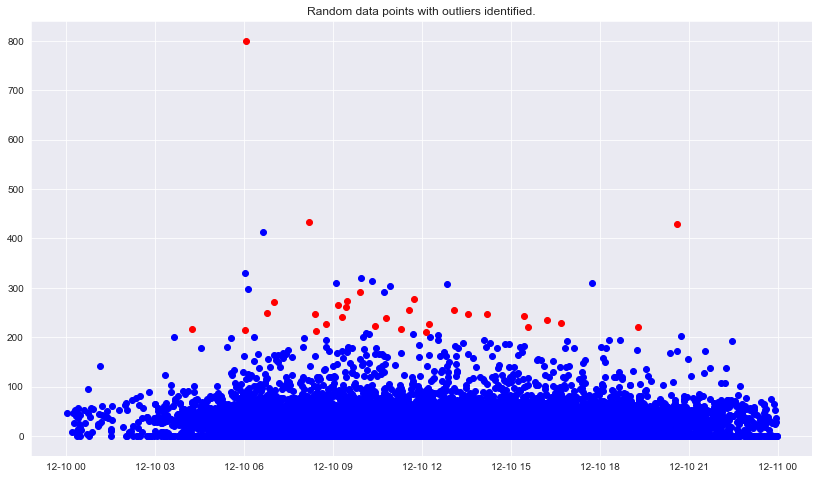

In [491]:
plt.scatter(x=normal_data['timestamp'],y=normal_data['avg_speed'],color='b')
plt.scatter(x=outliers['timestamp'],y=outliers['avg_speed'],color='r')
plt.title("Random data points with outliers identified.")
plt.show()

<AxesSubplot:xlabel='timestamp'>

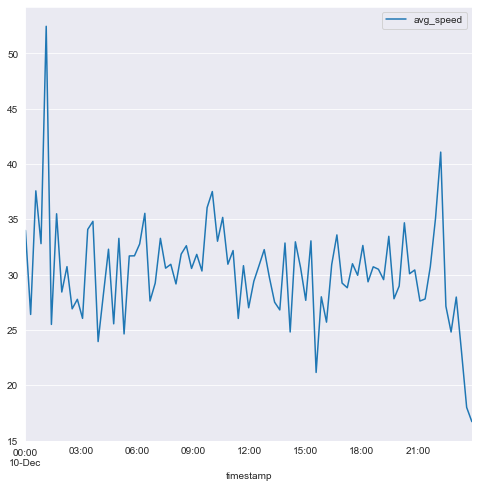

In [492]:
utils.create_speed_curve_plot_data(normal_data,'avg_speed',1000).plot.line(x='timestamp',y='avg_speed',figsize=(8,8))

In [493]:
plot_bus = utils.create_speed_curve_plot_data(bus_data,'velocity',1000)
plot_camera = utils.create_speed_curve_plot_data(normal_data,'avg_speed',1000)
plot_camera_before = utils.create_speed_curve_plot_data(cam_data,'avg_speed',1000)
plot_bus = plot_bus[plot_bus['velocity'] != 0]
plot_camera = plot_camera[plot_camera['avg_speed'] != 0]
plot_camera_before = plot_camera_before[plot_camera_before['avg_speed'] != 0]

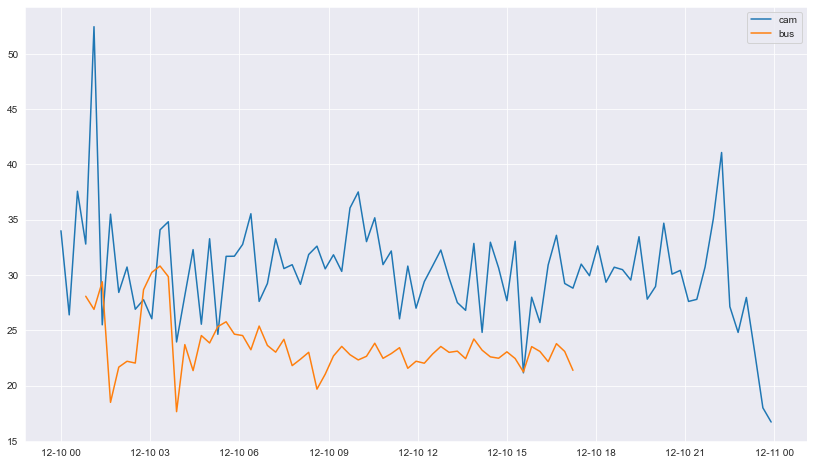

In [494]:
utils.two_line_plot(plot_bus,plot_camera)

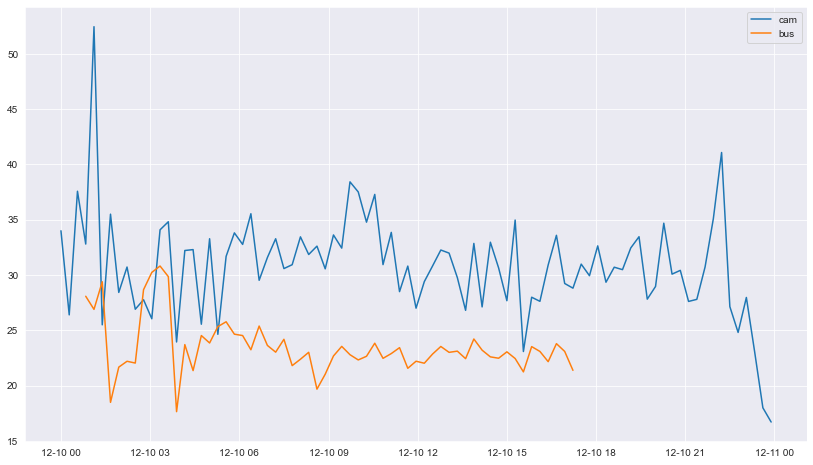

In [495]:
utils.two_line_plot(plot_bus,plot_camera_before)